<a href="https://colab.research.google.com/github/Dinuka-Thathsara/04-Apr-2022-DevOps__Scan-Images-In-ACR-Using-Trivy/blob/main/Feature_Engineering_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Needed Packages

In [ ]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

# Uploading Datasets

In [ ]:
train_dataset=pd.read_csv('train.csv')
valid_dataset=pd.read_csv('valid.csv')
test_dataset=pd.read_csv('test.csv')
## print shape of dataset with rows and columns
print(train_dataset.shape)
print(valid_dataset.shape)
print(test_dataset.shape)

(28520, 260)
(750, 260)
(750, 260)


In [ ]:
## print the top5 records
train_dataset.head()
valid_dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,-1.409379,0.320105,1.704116,1.655839,1.251337,-2.723541,-0.641919,-4.206987,-0.263210,0.194837,-2.158549,1.086174,0.501373,-1.598422,-1.976589,3.457837,-0.976514,0.201892,-0.226071,-0.410385,-1.571100,2.592908,-1.291827,-0.366841,-0.410952,1.015914,-1.904730,0.709462,0.591671,0.643340,-0.228592,0.556915,-0.645377,-3.040553,-1.637680,1.255634,1.715204,-0.688397,1.111274,0.497654,-1.042886,0.402539,-0.542546,1.105108,-0.747230,0.383964,-2.010832,0.953861,-0.790129,-0.476429,-1.070531,-1.575460,-1.174140,2.737756,1.564034,0.336269,-1.620437,-0.327836,0.249010,-0.284077,-1.151560,-0.180647,-0.453377,-1.388229,0.151455,0.905556,1.383817,2.559482,-3.119863,-0.791112,-1.569321,-1.430436,-1.514173,2.985236,0.580871,-0.764486,-0.260519,0.939849,-0.470598,-2.861254,-0.173464,2.016990,3.445552,-0.445339,1.212582,2.739672,-0.642328,1.219325,0.800850,-0.674323,-0.148795,-0.715005,0.016303,-0.687293,-2.884

# Check for Missing Values

In [ ]:
# Step 1: Make a list of features with missing values, excluding the last 4 columns
features_with_na = [feature for feature in train_dataset.columns[:-4] if train_dataset[feature].isnull().sum() > 1]

# Step 2: Check if there are any features with missing values
if not features_with_na:
    print("No missing values found in the selected features.")
else:
    # Print the feature name and the percentage of missing values
    for feature in features_with_na:
        print(feature, np.round(train_dataset[feature].isnull().mean(), 4), ' % missing values')

No missing values found in the selected features.


If all features have numerical data types, it will print "All features have numerical values." Otherwise, it will print "Not all features have numerical values.

In [ ]:
# Exclude the last 4 columns (labels )from checking
columns_to_check = train_dataset.columns[:-4]

# Check if all selected features have numerical values
all_features_numerical = all(train_dataset[feature].dtype != 'O' for feature in columns_to_check)

if all_features_numerical:
    print("All selected features have numerical values.")
else:
    print("Not all selected features have numerical values.")

All selected features have numerical values.


# Plotting Missing Values in Labels

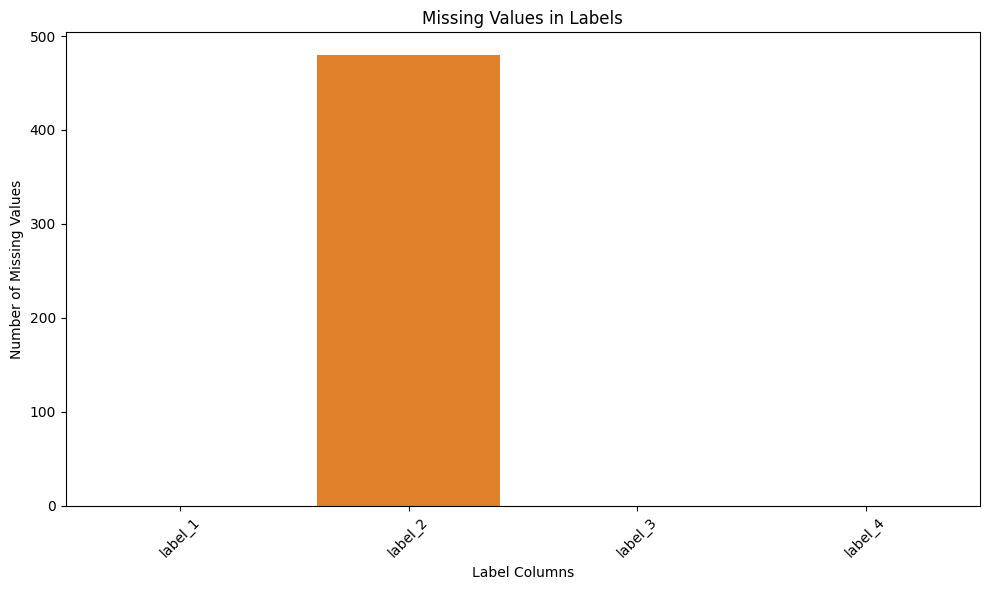

In [ ]:
# Separate features and labels
features = train_dataset.iloc[:, :256]
labels = train_dataset.iloc[:, -4:]

# Calculate missing values in labels
missing_values = labels.isnull().sum()

# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values in Labels')
plt.xlabel('Label Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Representation

**Labels** and **Features**


In [ ]:
LABELS = [f'label_{i}' for i in range(1, 5)]
FEATURES = [f'feature_{i}' for i in range(1, 257)]


# Preprocessing Techniques
In scikit-learn (sklearn), the StandardScaler is a preprocessing technique used to standardize features by removing the mean and scaling them to unit variance. This can be important for some machine learning algorithms that are sensitive to the scale of input features.

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_scaled={}
X_valid_scaled={}
Y_train_scaled={}
Y_valid_scaled={}
X_test_scaled={}
Y_test_scaled={}

for target_Label in LABELS:
    tr_d = train_dataset[train_dataset['label_2'].notna()] if target_Label == 'label_2' else train_dataset
    val_d = valid_dataset[valid_dataset['label_2'].notna()] if target_Label == 'label_2' else valid_dataset
    test_d= test_dataset
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and validation data
    X_train_scaled[target_Label]  = pd.DataFrame(scaler.fit_transform(tr_d.drop(LABELS, axis=1)), columns=FEATURES)
    Y_train_scaled[target_Label] =  tr_d[target_Label]
    X_valid_scaled[target_Label]  = pd.DataFrame(scaler.transform(val_d.drop(LABELS, axis=1)), columns=FEATURES)
    Y_valid_scaled[target_Label] =  val_d[target_Label]
    X_test_scaled[target_Label] = pd.DataFrame(scaler.fit_transform(test_d.drop(LABELS, axis=1)), columns=FEATURES)
    Y_test_scaled[target_Label] = test_d[target_Label]

# Label 1

## Model Training

In [ ]:
from sklearn import svm
classification=svm.SVC(kernel='linear')
classification.fit(X_train_scaled['label_1'],Y_train_scaled['label_1'])
y_prediction = classification.predict(X_valid_scaled['label_1'])
y_pred_test_before = classification.predict(X_test_scaled['label_1'])

In [ ]:
print('Predicted labels before feature engineering:', y_pred_test_before)

Predicted labels before feature engineering: [45 45 45 45 45 45  5  5  5  5 14  5  5  5  5  5  5  5 60 60 60 60 60 60
 60 60 19 19 19 19 19 19 19 19 19 19 39 19 19 19 19 19 11 11 11 11 11 11
 11 11 11 11 11 11 52 52 52 52 52 52 52 52 52 52 52 25 25 25 25 25 25 24
 25 25 25 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 51
 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 35 35 35 35 35 35 35 35
 56 56 56 56 56 56 56 56 56 56 56 53 53 53 53 53 53 22 53 53 53  3  3  3
  3  3  3  3  3  3  3 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 43 43
 43 43 43 43 43 43 43 43 43 58 58 58 58 58 58 58 58 44 44 44 44 44 44 44
 44 44 44 44 44 44 44 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 17 17 17 17 17 17 17
 17 17 17 17 17 17  2  2  2  2  2  2  2  2  2  2  2  2 47 47 47 47 47 47
 47 47 47 58 47 47 47 54 54 54 54 54 54 54 54 54 54 54 21 21 21 21 21 21
 21 21 21 21 21 21 34 34 34 34 34 34 34 34 34 23 23 23 23 23 23 23 23 23
 23 23

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_1'] ,y_prediction))

[[12  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]


In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))

0.98180495985496


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_1'] ,y_prediction))

0.98


In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))

0.98


## Applying Feature Selection Techniques

### Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif,k=75)
X_new_f1 = selector.fit_transform(X_train_scaled['label_1'],Y_train_scaled['label_1'])
print ('New Shape according to the feature selection technique 1', X_new_f1.shape )


New Shape according to the feature selection technique 1 (28520, 75)


Then try to train the model with new feature count and see the difference.



---





In [ ]:
classification=svm.SVC(kernel='linear')
classification.fit(X_new_f1,Y_train_scaled['label_1'])
y_prediction = classification.predict(selector.transform(X_valid_scaled['label_1']))
y_test_prediction = classification.predict(selector.transform(X_test_scaled['label_1']))
print(y_test_prediction)


[45 45 45 45 45 45  5  5  5  5  5  5  5  5  5  5  5  5 60 60 60 60 60 60
 60 60 19 19 19 19 19 19 19 19 19  6 19 19 19 19 19 19 11 11 11 11 11 11
 11 11 11 11 11 11 52 36 52 52 52 52 52 52 52 52 52 25 25 25 25 25 25 25
 25 25 25 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 51
 40 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 35 35 35 35 35 35 35 35
 56 56 56 56 56 56 56 56 56 56 56 53 53 53 53 53 53 53 53 53 53  3  3  3
  3  3  3  3  3  3  3 40 40 40 40 40 40 40 20 40 40 40 40 40 40 40 43 43
 43 43 43 43 43 43 43 43 43 58 58 47 58 58 58 58 58 44 44 44 44 44 44 44
 44 44 44 44 44 44 44 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 17 17 17 17 17  1 17
 17 17 17 17 17 17  2  2  2  2 14  2  2  2  2  2  2  2 47 47 47 47 47 47
 47 47 47 43 47 47 47 54 54 54 54 46 54 54 54 54 54 54 21 21 21 21 21 21
 21 21 21 21 21 21 34 34 34 34 34 34 34 34 34 23 23 23 23 23 23 23 23 23
 23 23 23 23 10 10 10 10 10 10 10 10 10 10 10 28 28

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_1'] ,y_prediction))

[[11  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  1  0  9]]


In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))

0.9736650570275958


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_1'] ,y_prediction))

0.972


In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))

0.972


In [ ]:
print ('precision:',metrics.precision_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))
print ('accuracy: ',metrics.accuracy_score( Y_valid_scaled['label_1'] ,y_prediction))
print ('recall:', metrics.recall_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))


precision: 0.9736650570275958
accuracy:  0.972
recall: 0.972


According to this feature selection method  to streamline model managed to reduce the feature count from 256 to 100. However, this reduction was accompanied by a slight dip in the model's accuracy. This decline can be traced back to the careful selection of pertinent features and the omission of less impactful ones during the feature selection process. Unfortunately, this might have unintentionally led to the exclusion of certain information that was contributing to the original model's accuracy.

The primary goal of feature selection is to refine the model by excluding irrelevant or redundant features, but it's vital to acknowledge that the interactions between features also play a pivotal role in the model's performance. By decreasing the feature count, I may have inadvertently removed critical interactions that were essential for accurate predictions.

Another important consideration is the possibility of noise or unnecessary complexity introduced by some features. The removal of such features was aimed at enhancing generalization, which is particularly advantageous when dealing with extensive sets of features. However, it's crucial to strike a balance, as an excessive removal of features could lead the model to oversimplify and miss the intricate nuances in the data, ultimately resulting in reduced accuracy.


### sklearn.decomposition.PCA

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.88,svd_solver='full')
pca.fit(X_train_scaled['label_1'])
x_train_transformation= pd.DataFrame(pca.transform(X_train_scaled['label_1']))
x_valid_transformation= pd.DataFrame(pca.transform(X_valid_scaled['label_1']))
x_test_transformation= pd.DataFrame(pca.transform(X_test_scaled['label_1']))
x_test_transformation_pass= pca.transform(X_test_scaled['label_1'])
print ('New Shape according to the feature selection technique 1', x_train_transformation.shape )



New Shape according to the feature selection technique 1 (28520, 44)


Then try to train the model with new feature count and see the difference.

In [ ]:
classification=svm.SVC(kernel='linear')
classification.fit(x_train_transformation,Y_train_scaled['label_1'])
y_prediction = classification.predict(x_valid_transformation)
y_pred_test_after = classification.predict(x_test_transformation)
print('Predicted labels after feature engineering:', y_pred_test_after)

Predicted labels after feature engineering: [45 45 45 45 45 45  5  5  5  5  7  5  5  5  5  5  5  5 60 60 60 60 60 60
 60 60 19 19 19 19 19 19 19 19 19 19 39 19 19 19 19 19 11 11 11 11 11 11
 11 11 11 11 11 11 52 36 52 52 52 52 52 52 52 52 52 25 25 25 25 25 25 25
 25 25 25 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 51
 40 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 35 29 35 35 35 35 35 35
 56 56 56 56 56 56 56 56 56 56 56 53 53 53 53 53 53 50 53 53 53  3  3  3
  3  3  3  3  3  3  3 40 40 40 40 40 40 40 20 40 40 40 40 40 40 40 43 58
 43 43 43 43 43 43 43 43 43 58 58 58 58 58 58 58 58 44 44 44 44 44 44 44
 44 44 44 44 44 44 44 37 37 37 37 37 37 37 37 37 37 37 37 20 37 37 37 37
 55 55 55 55 55 55 55 55 55 55 55 39 55 55 55 55 55 17  2 17 24 17 17 17
 17 17 17 17 17 15  2  2 19  2 18  2  2  2  2  2  2  2 47 47 47 47 47 47
 47 47 47 26 47 47 47 54 54 54 54 46 53 54 54 54 54 54 21 21 21 21 21 21
 21 21 21 21 21 21 34 27 34 34 34 34 34 34 34 23 23 23 23 23 23 23 23 23
 23 23 

In [ ]:
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test_before,
    'Predicted labels after feature engineering': y_pred_test_after,
    'No. of new features': x_test_transformation_pass.shape[1]
})


for i in range(x_test_transformation_pass.shape[1]):
  output_df[f'New feature {i+1}'] = x_test_transformation_pass[:, i]

output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No. of new features,New feature 1,New feature 2,New feature 3,New feature 4,New feature 5,New feature 6,New feature 7,New feature 8,New feature 9,New feature 10,New feature 11,New feature 12,New feature 13,New feature 14,New feature 15,New feature 16,New feature 17,New feature 18,New feature 19,New feature 20,New feature 21,New feature 22,New feature 23,New feature 24,New feature 25,New feature 26,New feature 27,New feature 28,New feature 29,New feature 30,New feature 31,New feature 32,New feature 33,New feature 34,New feature 35,New feature 36,New feature 37,New feature 38,New feature 39,New feature 40,New feature 41,New feature 42,New feature 43,New feature 44
0,45,45,44,-2.031041,7.072996,-3.899170,-1.139218,-6.607480,-1.029961,3.773949,2.677365,6.098684,1.982514,4.271610,-0.406518,-0.540450,-3.835481,0.779858,-2.234409,0.416891,1.855999,-2.593841,-0.777323,-1.372895,1.763319,-0.558357,-3.118723,-2.326503,0.724986,1.451095,-1.011355,-2.530412,1.979696,1.353403,0.300167,2.737875,2.935505,-0.935346,-1.454484,-0.471733,2.441985,-1.187771,-0.387655,-0.386766,0.573784,2.539350,-0.666926
1,45,45,44,-6.757219,9.020226,-0.445499,-10.395753,-4.692880,2.287994,-1.798454,2.344746,-2.620985,7.354878,-0.439397,-1.280962,-2.865353,-0.332620,-3.267785,3.044503,-2.110337,-2.286687,-1.466394,-1.599279,0.393073,3.609559,-0.204600,-2.513195,-2.702389,1.877266,-2.680341,0.495570,0.172885,0.224661,0.945643,0.240523,-0.889786,0.383714,-0.602832,-1.553723,-1.209518,0.948211,-0.729147,-0.962219,-0.775931,-1.569257,0.893573,0.399989
2,45,45,44,-4.869828,3.637857,-0.251019,-5.658368,-2.325319,-1.254303,-0.189561,-0.317199,-5.770944,4.860928,2.908031,-0.782643,-1.435120,-3.528007,-1.247274,1.017284,2.006186,0.131780,-1.293697,-2.652614,-0.442117,3.247119,0.056819,-5.288655,-1.799017,0.439549,-2.490127,1.684036,0.167060,1.223364,2.511806,-0.065658,-0.749571,-1.029651,-1.081592,-1.382162,-0.782291,0.076146,0.992883,-0.258094,-0.705611,0.900671,0.309704,1.042084
3,45,45,44,-2.185382,6.080549,-1.050191,-0.983411,2.460842,4.478364,0.687827,0.340539,1.508543,6.158429,3.231875,3.770242,2.019773,-3.831132,1.881271,1.483123,-2.009631,-2.891516,3.055495,-2.692857,-0.153073,1.404473,-0.204970,-6.016035,0.011836,-1.896885,0.218005,1.522549,-2.892885,1.143720,1.264005,-1.138008,-2.420727,-2.088253,-1.291993,-0.584451,-2.098503,0.148559,1.161322,-2.600385,0.400560,0.977827,-0.855402,-0.446161
4,45,45,44,0.699202,6.304911,1.514615,-3.189496,-2.997243,-1.164269,1.858609,3.491644,0.830667,7.437580,-0.771613,1.720614,0.374078,-1.453283,0.912510,-1.763192,-1.246238,0.292901,-1.563358,-0.790820,-1.679885,4.156949,0.301556,0.254043,1.128256,1.104217,-0.827386,0.686154,1.817153,2.380075,-0.552908,0.795972,-1.427992,0.447777,-0.112454,-0.795440,-1.952042,0.524060,0.007208,2.851649,0.776596,0.756446,-0.818649,-2.182648


In [ ]:
# Save the DataFrame to the specified CSV file path
output_df.to_csv(f"190282X_label_1.csv", index=False)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_1'] ,y_prediction))

[[ 0  0  0 ...  0  0  0]
 [ 1 12  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 ...
 [19  1  0 ...  0  0  0]
 [ 9  1  0 ...  0  0  0]
 [10  0  0 ...  0  0  0]]


In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))

0.0003449419568822554


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_1'] ,y_prediction))

In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))

In [ ]:
print ("precesion:",metrics.precision_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))
print ("accracy: ",metrics.accuracy_score( Y_valid_scaled['label_1'] ,y_prediction))
print ("recall: ",metrics.recall_score( Y_valid_scaled['label_1'] ,y_prediction,average='weighted'))


precesion: 0.9511814327571293
accracy:  0.9466666666666667
recall:  0.9466666666666667


# Label 2

## Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the KNN classifier to the training data
knn_classifier.fit(X_train_scaled['label_2'], Y_train_scaled['label_2'])

# Make predictions using the KNN classifier
y_prediction = knn_classifier.predict(X_valid_scaled['label_2'])
y_pred_test_before = knn_classifier.predict(X_test_scaled['label_2'])
print('Predicted labels before feature engineering:', y_pred_test_before)


Predicted labels before feature engineering: [26. 31. 31. 27. 31. 27. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 27. 27. 27. 27. 27. 27. 27. 27. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23.
 23. 23. 26. 23. 23. 23. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30. 30. 30. 30. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26.
 26. 26. 26. 26. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 33. 24. 24. 31. 31. 31.
 31. 31. 31. 31. 31. 31. 31. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26.
 26. 26. 26. 26. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 29. 29. 29.
 29. 29. 29. 29. 29. 61. 61. 61. 61. 61. 61. 61. 61. 61. 61. 61. 61. 61.
 61. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 31. 27. 27. 27. 27.
 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 26.
 26. 2

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_2'] ,y_prediction))

[[ 36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  70   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   1  44   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0  78   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0 115   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  81   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  46   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   1   0  46   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0  64   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  30   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  11   0   0   0]
 [  0 

In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_2'] ,y_prediction,average='weighted'))

0.9880671083222579


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_2'] ,y_prediction))

0.9877717391304348


In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_2'] ,y_prediction,average='weighted'))

0.9877717391304348


## Applying Feature Selection Techniques

### sklearn.decomposition.PCA

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.75,svd_solver='full')
pca.fit(X_train_scaled['label_2'])
x_train_transformation= pd.DataFrame(pca.transform(X_train_scaled['label_2']))
x_valid_transformation= pd.DataFrame(pca.transform(X_valid_scaled['label_2']))
x_test_transformation= pca.transform(X_test_scaled['label_2'])
print ('New Shape according to the feature selection technique 1', x_train_transformation.shape )



New Shape according to the feature selection technique 1 (28040, 25)


Then try to train the model with new feature count and see the difference.

In [ ]:

from sklearn.neighbors import KNeighborsClassifier



# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the KNN classifier to the training data
knn_classifier.fit(x_train_transformation, Y_train_scaled['label_2'])

# Make predictions using the KNN classifier
y_prediction = knn_classifier.predict(x_valid_transformation)

y_pred_test_after = knn_classifier.predict(x_test_transformation)
print('Predicted labels after feature engineering:', y_pred_test_after)


Predicted labels after feature engineering: [26. 31. 27. 27. 31. 23. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 27. 27. 27. 27. 27. 27. 27. 27. 23. 23. 23. 23. 23. 25. 23. 23. 23. 23.
 23. 23. 26. 23. 23. 23. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 34. 22. 34. 34. 34. 34. 34. 34. 34. 34. 34. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30. 30. 30. 30. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26.
 26. 26. 26. 26. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 24. 33. 24. 24. 31. 31. 31.
 31. 31. 31. 31. 31. 31. 31. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26.
 26. 26. 26. 26. 31. 31. 31. 31. 31. 34. 31. 31. 31. 31. 31. 29. 29. 29.
 29. 29. 29. 29. 29. 61. 61. 61. 61. 61. 61. 61. 61. 61. 61. 61. 61. 61.
 61. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 31. 27. 27. 27. 27.
 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 28. 23. 23. 23. 26. 23. 26.
 26. 26

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_2'] ,y_prediction))

[[ 34   0   0   0   0   1   0   1   0   0   0   0   0   0   0   0   0]
 [  0  69   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0  43   0   0   0   0   1   0   0   0   2   0   0   0   0   0]
 [  0   0   0  77   1   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   1   2 110   0   0   0   0   0   0   0   0   0   1   1   0]
 [  0   1   0   0   1  79   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  46   0   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0  43   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   0   0   0  45   0   0   0   0   0   0   0   0]
 [  0   0   1   0   1   0   0   0   1  61   1   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  30   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  11   0   0   0]
 [  0 

In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_2'] ,y_prediction,average='weighted'))

0.9620553181192202


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_2'] ,y_prediction))

0.9605978260869565


In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_2'] ,y_prediction,average='weighted'))

0.9605978260869565


In [ ]:
print ("precision",metrics.precision_score( Y_valid_scaled['label_2'] ,y_prediction,average='weighted'))
print ("accuracy",metrics.accuracy_score( Y_valid_scaled['label_2'] ,y_prediction))
print ("recall",metrics.recall_score( Y_valid_scaled['label_2'] ,y_prediction,average='weighted'))


precision 0.9620553181192202
accuracy 0.9605978260869565
recall 0.9605978260869565


In [ ]:
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test_before,
    'Predicted labels after feature engineering': y_pred_test_after,
    'No. of new features': x_test_transformation.shape[1]
})


for i in range(x_test_transformation.shape[1]):
  output_df[f'New feature {i+1}'] = x_test_transformation[:, i]

output_df.head()

In [ ]:
output_df.to_csv(f"190282X_label_2.csv", index=False)

# Label 3

## Model Training

In [ ]:
from sklearn import svm
classification=svm.SVC(kernel='linear')
classification.fit(X_train_scaled['label_3'],Y_train_scaled['label_3'])
y_prediction = classification.predict(X_valid_scaled['label_3'])
y_pred_test_before = classification.predict(X_test_scaled['label_3'])
print('Predicted labels before feature engineering:', y_pred_test_before)


Predicted labels before feature engineering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_3'] ,y_prediction))

[[142   0]
 [  1 607]]


In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_3'],y_prediction))

1.0


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_3'] ,y_prediction))

0.9986666666666667


In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_3'] ,y_prediction))

0.9983552631578947


## Applying Feature Selection Techniques

### Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif,k=10)
X_new_f1 = selector.fit_transform(X_train_scaled['label_3'],Y_train_scaled['label_3'])
print ('New Shape according to the feature selection technique 1', X_new_f1.shape )


New Shape according to the feature selection technique 1 (28520, 10)


Then try to train the model with new feature count and see the difference.



---





In [ ]:
classification=svm.SVC(kernel='linear')
classification.fit(X_new_f1,Y_train_scaled['label_3'])
y_prediction = classification.predict(selector.transform(X_valid_scaled['label_3']))
y_test_prediction = classification.predict(selector.transform(X_test_scaled['label_3']))
print(y_test_prediction)





[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_3'] ,y_prediction))

[[137   5]
 [ 10 598]]


In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_3'] ,y_prediction,average='weighted'))

0.9774185666185666


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_3'] ,y_prediction))

0.98


In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_3'] ,y_prediction,average='weighted'))

1.0


In [ ]:
print('precision: ',metrics.precision_score( Y_valid_scaled['label_3'] ,y_prediction,average='weighted'))
print('accuracy: ',metrics.accuracy_score( Y_valid_scaled['label_3'] ,y_prediction))
print('recall: ',metrics.recall_score( Y_valid_scaled['label_3'] ,y_prediction,average='weighted'))

precision:  0.9803982355794724
accuracy:  0.98
recall:  0.98


According to this feature selection method  to streamline model managed to reduce the feature count from 256 to 5 and 25


### sklearn.decomposition.PCA

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.40,svd_solver='full')
pca.fit(X_train_scaled['label_1'])
x_train_transformation= pd.DataFrame(pca.transform(X_train_scaled['label_3']))
x_valid_transformation= pd.DataFrame(pca.transform(X_valid_scaled['label_3']))
x_test_transformation= pd.DataFrame(pca.transform(X_test_scaled['label_3']))
x_test_transformation_pass= pca.transform(X_test_scaled['label_3'])
print ('New Shape according to the feature selection technique 1', x_train_transformation.shape )



New Shape according to the feature selection technique 1 (28520, 7)


Then try to train the model with new feature count and see the difference.

In [ ]:
classification=svm.SVC(kernel='linear')
classification.fit(x_train_transformation,Y_train_scaled['label_3'])
y_prediction = classification.predict(x_valid_transformation)
y_pred_test_after = classification.predict(x_test_transformation)
print('Predicted labels after feature engineering:', y_pred_test_after)


Predicted labels after feature engineering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_3'] ,y_prediction))

[[128  14]
 [  9 599]]


In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_3'] ,y_prediction,average='weighted'))

0.9620553181192202


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_3'] ,y_prediction))

0.9605978260869565


In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_3'] ,y_prediction,average='weighted'))

0.9605978260869565


In [ ]:
print ("precision",metrics.precision_score( Y_valid_scaled['label_3'] ,y_prediction,average='weighted'))
print ("accuracy",metrics.accuracy_score( Y_valid_scaled['label_3'] ,y_prediction))
print ("recall",metrics.recall_score( Y_valid_scaled['label_3'] ,y_prediction,average='weighted'))


precision 0.9690476337901827
accuracy 0.9693333333333334
recall 0.9693333333333334


In [ ]:
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test_before,
    'Predicted labels after feature engineering': y_pred_test_after,
    'No. of new features': x_test_transformation_pass.shape[1]
})


for i in range(x_test_transformation_pass.shape[1]):
  output_df[f'New feature {i+1}'] = x_test_transformation_pass[:, i]

output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No. of new features,New feature 1,New feature 2,New feature 3,New feature 4,New feature 5,New feature 6,New feature 7,New feature 8,New feature 9,New feature 10,New feature 11,New feature 12,New feature 13,New feature 14,New feature 15,New feature 16,New feature 17,New feature 18,New feature 19,New feature 20,New feature 21,New feature 22,New feature 23,New feature 24,New feature 25,New feature 26,New feature 27,New feature 28,New feature 29,New feature 30,New feature 31,New feature 32,New feature 33,New feature 34,New feature 35,New feature 36,New feature 37,New feature 38,New feature 39,New feature 40,New feature 41,New feature 42,New feature 43,New feature 44,New feature 45,New feature 46,New feature 47,New feature 48,New feature 49
0,1,1,49,-2.031041,7.072996,-3.899170,-1.139218,-6.607480,-1.029961,3.773949,2.677365,6.098684,1.982514,4.271610,-0.406518,-0.540450,-3.835481,0.779858,-2.234409,0.416891,1.855999,-2.593841,-0.777323,-1.372895,1.763319,-0.558357,-3.118723,-2.326503,0.724986,1.451095,-1.011355,-2.530412,1.979696,1.353403,0.300167,2.737875,2.935505,-0.935346,-1.454484,-0.471733,2.441985,-1.187771,-0.387655,-0.386766,0.573784,2.539350,-0.666926,1.650883,-0.689341,-0.584489,-0.285500,0.766816
1,1,1,49,-6.757219,9.020226,-0.445499,-10.395753,-4.692880,2.287994,-1.798454,2.344746,-2.620985,7.354878,-0.439397,-1.280962,-2.865353,-0.332620,-3.267785,3.044503,-2.110337,-2.286687,-1.466394,-1.599279,0.393073,3.609559,-0.204600,-2.513195,-2.702389,1.877266,-2.680341,0.495570,0.172885,0.224661,0.945643,0.240523,-0.889786,0.383714,-0.602832,-1.553723,-1.209518,0.948211,-0.729147,-0.962219,-0.775931,-1.569257,0.893573,0.399989,-0.748271,0.128024,-0.401761,0.173239,1.512876
2,1,1,49,-4.869828,3.637857,-0.251019,-5.658368,-2.325319,-1.254303,-0.189561,-0.317199,-5.770944,4.860928,2.908031,-0.782643,-1.435120,-3.528007,-1.247274,1.017284,2.006186,0.131780,-1.293697,-2.652614,-0.442117,3.247119,0.056819,-5.288655,-1.799017,0.439549,-2.490127,1.684036,0.167060,1.223364,2.511806,-0.065658,-0.749571,-1.029651,-1.081592,-1.382162,-0.782291,0.076146,0.992883,-0.258094,-0.705611,0.900671,0.309704,1.042084,-1.556142,-0.251696,0.544656,1.702426,-0.604844
3,1,1,49,-2.185382,6.080549,-1.050191,-0.983411,2.460842,4.478364,0.687827,0.340539,1.508543,6.158429,3.231875,3.770242,2.019773,-3.831132,1.881271,1.483123,-2.009631,-2.891516,3.055495,-2.692857,-0.153073,1.404473,-0.204970,-6.016035,0.011836,-1.896885,0.218005,1.522549,-2.892885,1.143720,1.264005,-1.138008,-2.420727,-2.088253,-1.291993,-0.584451,-2.098503,0.148559,1.161322,-2.600385,0.400560,0.977827,-0.855402,-0.446161,-1.031986,0.232316,0.411214,-1.096601,0.987214
4,1,1,49,0.699202,6.304911,1.514615,-3.189496,-2.997243,-1.164269,1.858609,3.491644,0.830667,7.437580,-0.771613,1.720614,0.374078,-1.453283,0.912510,-1.763192,-1.246238,0.292901,-1.563358,-0.790820,-1.679885,4.156949,0.301556,0.254043,1.128256,1.104217,-0.827386,0.686154,1.817153,2.380075,-0.552908,0.795972,-1.427992,0.447777,-0.112454,-0.795440,-1.952042,0.524060,0.007208,2.851649,0.776596,0.756446,-0.818649,-2.182648,-0.238775,-1.197995,0.959438,-0.099103,-0.657507


In [ ]:
output_df.to_csv(f"190282X_label_3.csv", index=False)

# Label 4

## Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the KNN classifier to the training data
knn_classifier.fit(X_train_scaled['label_4'], Y_train_scaled['label_4'])

# Make predictions using the KNN classifier
y_prediction = knn_classifier.predict(X_valid_scaled['label_4'])
y_pred_test_before = knn_classifier.predict(X_test_scaled['label_4'])
print('Predicted labels before feature engineering:', y_pred_test_before)



Predicted labels before feature engineering: [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 13 13 13 13 13 13
 13 13  4  4  4  4  4  4  4  4  4  4  4  4  6  4  4  4  6  6  6  6  6  6
  6  6  6  6  6  6  5  5  5  5  5  5  5  5  5  5  5  1  1  1  1  1  1  1
  1  1  1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  2  2  2  2  2  2  2  2
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7 12  7  7  7  7
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  3  3  3  3  3  3
  3  3  3  3  3  3  3  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_4'] ,y_prediction))

[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 532   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1  31   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  18   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0  25   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]


In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_4'] ,y_prediction,average='weighted'))

0.9947064676616915


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_4'] ,y_prediction))

0.9946666666666667


In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_4'] ,y_prediction,average='weighted'))

0.9946666666666667


## Applying Feature Selection Techniques

### sklearn.decomposition.PCA

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.70,svd_solver='full')
pca.fit(X_train_scaled['label_4'])
x_train_transformation= pd.DataFrame(pca.transform(X_train_scaled['label_4']))
x_valid_transformation= pd.DataFrame(pca.transform(X_valid_scaled['label_4']))
x_test_transformation= pca.transform(X_test_scaled['label_4'])


print ('New Shape according to the feature selection technique 1', x_train_transformation.shape )



New Shape according to the feature selection technique 1 (28520, 21)


Then try to train the model with new feature count and see the difference.

In [ ]:

from sklearn.neighbors import KNeighborsClassifier



# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the KNN classifier to the training data
knn_classifier.fit(x_train_transformation, Y_train_scaled['label_4'])

# Make predictions using the KNN classifier
y_prediction = knn_classifier.predict(x_valid_transformation)
y_pred_test_after = knn_classifier.predict(x_test_transformation)
print('Predicted labels after feature engineering:', y_pred_test_after)


Predicted labels after feature engineering: [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 13 13 13 13 13 13
 13 13  4  4  4  4  4  6  4  4  1  4  4  4  4  6  4  4  6  6  6  6  6  6
  6  6  6  6  6  6  5  5  5  5  5  5  5  5  5  5  5  1  1  1  1  1  1  1
  1  1  1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  2  6  6  6  6  6  6  6  6  6  6  6  2  2  2  2  2  6  2  2
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  6  7  7  7  7  7  7  7 12  7  7  7  7
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  3  3  3  3  3  3
  3  3  3  3  3  3  3  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6 

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix( Y_valid_scaled['label_4'] ,y_prediction))

[[ 19   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   9   0   0   0   0   1   1   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  14   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  4   0   4   0   0   0 523   1   0   0   0   0   0   0]
 [  1   0   0   0   1   0   0  30   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3   0  16   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0  16   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0   0  23   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]


In [ ]:
print (metrics.precision_score( Y_valid_scaled['label_4'] ,y_prediction,average='weighted'))

0.9766319451841071


In [ ]:
print (metrics.accuracy_score( Y_valid_scaled['label_4'] ,y_prediction))

0.976


In [ ]:
print (metrics.recall_score( Y_valid_scaled['label_4'] ,y_prediction,average='weighted'))

0.976


In [ ]:
print('precision: ',metrics.precision_score( Y_valid_scaled['label_4'] ,y_prediction,average='weighted'))
print('accuracy: ',metrics.accuracy_score( Y_valid_scaled['label_4'] ,y_prediction))
print('recall: ',metrics.recall_score( Y_valid_scaled['label_4'] ,y_prediction,average='weighted'))

precision:  0.9696112250025123
accuracy:  0.968
recall:  0.968


In [ ]:
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test_before,
    'Predicted labels after feature engineering': y_pred_test_after,
    'No. of new features': x_test_transformation.shape[1]
})


for i in range(x_test_transformation.shape[1]):
  output_df[f'New feature {i+1}'] = x_test_transformation[:, i]

output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No. of new features,New feature 1,New feature 2,New feature 3,New feature 4,New feature 5,New feature 6,New feature 7,New feature 8,New feature 9,New feature 10,New feature 11,New feature 12,New feature 13,New feature 14,New feature 15,New feature 16,New feature 17,New feature 18,New feature 19,New feature 20,New feature 21
0,6,6,21,-2.031041,7.072996,-3.899170,-1.139218,-6.607480,-1.029961,3.773949,2.677365,6.098684,1.982514,4.271610,-0.406518,-0.540450,-3.835481,0.779858,-2.234409,0.416891,1.855999,-2.593841,-0.777323,-1.372895
1,6,6,21,-6.757219,9.020226,-0.445499,-10.395753,-4.692880,2.287994,-1.798454,2.344746,-2.620985,7.354878,-0.439397,-1.280962,-2.865353,-0.332620,-3.267785,3.044503,-2.110337,-2.286687,-1.466394,-1.599279,0.393073
2,6,6,21,-4.869828,3.637857,-0.251019,-5.658368,-2.325319,-1.254303,-0.189561,-0.317199,-5.770944,4.860928,2.908031,-0.782643,-1.435120,-3.528007,-1.247274,1.017284,2.006186,0.131780,-1.293697,-2.652614,-0.442117
3,6,6,21,-2.185382,6.080549,-1.050191,-0.983411,2.460842,4.478364,0.687827,0.340539,1.508543,6.158429,3.231875,3.770242,2.019773,-3.831132,1.881271,1.483123,-2.009631,-2.891516,3.055495,-2.692857,-0.153073
4,6,6,21,0.699202,6.304911,1.514615,-3.189496,-2.997243,-1.164269,1.858609,3.491644,0.830667,7.437580,-0.771613,1.720614,0.374078,-1.453283,0.912510,-1.763192,-1.246238,0.292901,-1.563358,-0.790820,-1.679885


In [ ]:
output_df.to_csv(f"190282X_label_4.csv", index=False)